# Ex2 - Getting and Knowing your Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [37]:
import pandas as pd
import seaborn as sns



### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

In [5]:
# import dataset from https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv
chipo = pd.read_table('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv')

### Step 3. Assign it to a variable called chipo.

In [6]:
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='\t', index_col=0)

### Step 4. See the first 10 entries

In [38]:
# first 10 entries
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
6,3,1,Side of Chips,NaN,1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25


### Step 5. What is the number of observations in the dataset?

LinAlgError: singular matrix

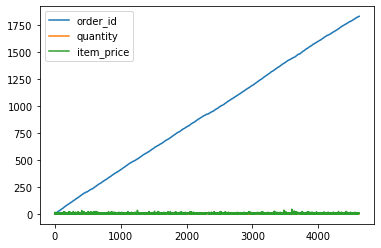

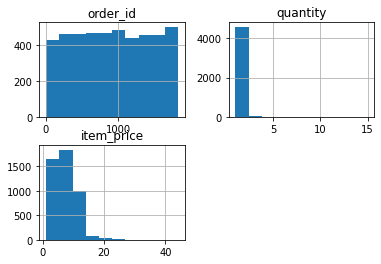

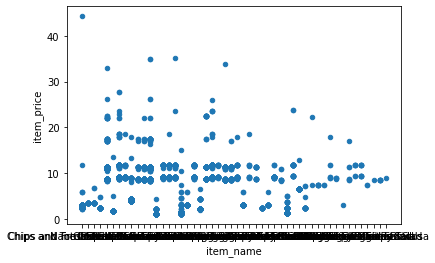

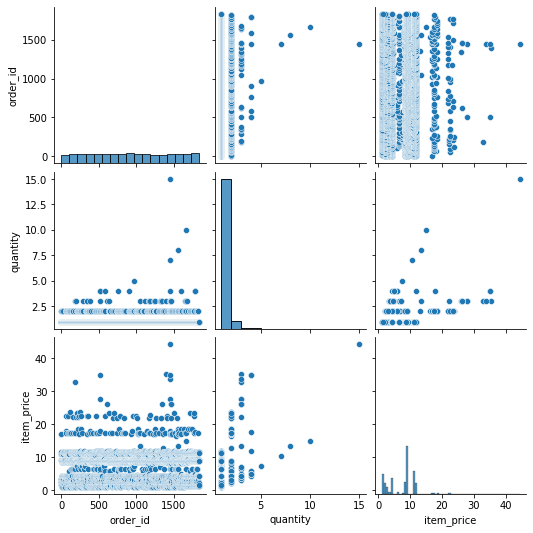

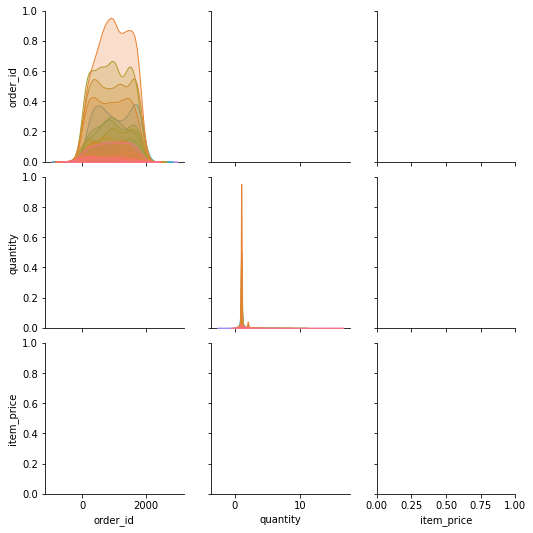

In [45]:
#number of observations in th dataset
chipo.shape[0]
#autre Solution
chipo.shape
chipo.plot()
chipo.hist()
chipo.plot.scatter(x='item_name', y='item_price')
sns.pairplot(chipo)
sns.pairplot(chipo, hue='')




In [10]:
# Solution 2
chipo.shape[0] # number of observations
chipo.shape[1] # number of variables
chipo.columns # list of variables
chipo.dtypes # data types of each variable
chipo.describe() # summary statistics
chipo.info() # number of non-null observations for each variable
chipo.isnull().sum() # number of null observations for each variable
chipo.isnull().sum().sum() # total number of null observations
chipo.isnull().sum().sum()/chipo.shape[0] # proportion of null observations
len(chipo) # number of observations




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


0.26958026828212894

### Step 6. What is the number of columns in the dataset?

In [49]:
#number of columns in the dataset
chipo.shape[1]


5

### Step 7. Print the name of all the columns.

In [13]:
#print the name of all the columns
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

### Step 8. How is the dataset indexed?

In [14]:
#dataset indexed
chipo.index # list of observations
chipo.index.name # name of the index
chipo.index.dtype # data type of the index
chipo.index.values # values of the index
chipo.index.is_unique # whether the index is unique
chipo.index.is_monotonic # whether the index is monotonic
chipo.index.is_monotonic_increasing # whether the index is monotonic increasing
chipo.index.is_monotonic_decreasing # whether the index is monotonic decreasing
chipo.index.is_unique # whether the index is unique


True

### Step 9. Which was the most-ordered item? 

In [51]:
#which was the most-ordered item
chipo['item_name'].value_counts().head(1)

#items = chipo[['item_name','quantity']].groupby('item_name').agg(['count','sum']).sort_values(('quantity', 'sum'), ascending=False)



#print(items.index[0])

Chicken Bowl


### Step 10. For the most-ordered item, how many items were ordered?

In [35]:
# how many items were orderer in the most-ordered item
chipo['item_name'].value_counts().head(1).values[0]




726

### Step 11. What was the most ordered item in the choice_description column?

In [20]:
#what was the most ordered item in the choice_description column
chipo['choice_description'].value_counts().head(1)

[Diet Coke]    134
Name: choice_description, dtype: int64

### Step 12. How many items were orderd in total?

In [21]:
#how many items were ordered in total
chipo['choice_description'].value_counts().head(1).values[0]

134

### Step 13. Turn the item price into a float

In [22]:
#turn the item price into a float
chipo['item_price'] = chipo['item_price'].str.replace('$','').astype(float)

C:\Users\lajaa\AppData\Local\Temp/ipykernel_14168/2444027768.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  chipo['item_price'] = chipo['item_price'].str.replace('$','').astype(float)


#### Step 13.a. Check the item price type

In [23]:
#check the item price type
chipo['item_price'].dtype

dtype('float64')

#### Step 13.b. Create a lambda function and change the type of item price

In [28]:
#create a lambda function and change the type of the item price
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x))



#### Step 13.c. Check the item price type

In [29]:
#check the price type
chipo['item_price'].dtype

dtype('float64')

### Step 14. How much was the revenue for the period in the dataset?

In [30]:
#how much was the revenue for the period in the dataset
chipo['item_price'].sum()


34500.16

### Step 15. How many orders were made in the period?

In [52]:
#how many orders were made in the perdiod
chipo['quantity'].sum()

4972

### Step 16. What is the average revenue amount per order?

In [31]:
# Solution 1
#what is the average revenue amount per order
chipo['item_price'].sum()/chipo['quantity'].sum()




6.938889782783589

In [53]:
# Solution 2

chipo.groupby(by=['order_id']).sum().mean()['revenue']

KeyError: 'revenue'

### Step 17. How many different items are sold?

In [34]:
#how many different items are sold
chipo['item_name'].nunique()

50